<a href="https://colab.research.google.com/github/Humam-PS/Deep-Learning/blob/main/tensorflow_fashion_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Python Modules or Files from Drive into Colab

## 1) Mount your google drive in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) We'll need to update our path to import from Drive.

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')

## 3) Now, we can be able to import our modules or files stuff from drive

In [ ]:
### To import using the following code lines, *.py files should be in drive ###
# from myplts import plt_bar, plt_img

In [ ]:
### You can import *.ipynb files directly ### - Here, install library

# Method_01
!pip install kora -q
from kora import drive
drive.link_nbs()

from myplts import plt_bar, plt_img

# Method_02
#!cp -r "/content/drive/MyDrive/Colab Notebooks/myplts.ipynb" '/content/'

     |████████████████████████████████| 61kB 3.6MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
importing Jupyter notebook from /nbs/myplts.ipynb


# Main Code

In [ ]:
# import tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
# import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# print version of tensorflow framework
print(tf.__version__)

2.4.1


In [ ]:
# import the fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
#digit_mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
print(len(train_labels))
train_labels

60000


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

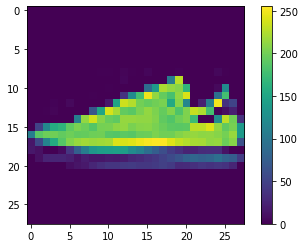

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
i = 6
# Visualize one sample:
plt.figure()
plt.imshow(train_images[i])
plt.colorbar()                # [0-255]
plt.show()

# Also you can see its matrix value
train_images[i]

In [ ]:
# ****************** PREPROCESS THE DATASET **********************************

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
# Creat class_names list correspond to [0-9] values
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

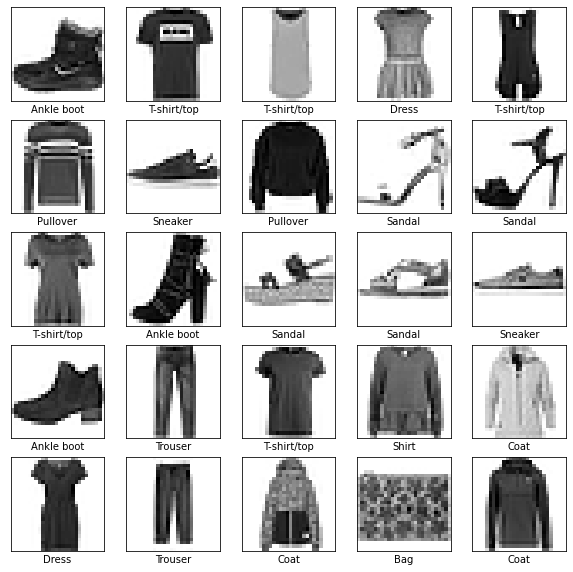

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# ****************** SET UP THE LAYERS **********************************

In [ ]:
# Input Layer - Flatten the two dimensional array (28X28) into 1D array
# Hidden Layer - Dense fully connected layer of 128 nodes (relu)
# output Layer - Dense fully connected layer of 10 nodes (softmax)

In [ ]:
# define neural_network (define the keras model), it's not optimal, It has to be optimized
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    # Input layer,  type 'Flatten' and number '28*28=784' 
    keras.layers.Dense(128, activation='relu'),   # Hidden layer, type 'Dense' and number '128'
    keras.layers.Dense(10, activation='softmax')  # Output layer, type 'Dense' and number '10'
])

In [ ]:
# ****************** COMPILE AND OPTIMIZE THE MODEL **********************************

In [ ]:
# To do this we need to understand 3 things:
    # 1- loss function - measures how accurate the ouput is
    # 2- Optimizer     - measures how the model is updated
    # 3- Metrics       - monitors the training to determine when stop

In [ ]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

In [ ]:
# ****************** TRAINING THE NEURON MODEL **********************************

# Train the neural network: fit the neuron model to the training data

# We are going to train the models in 10 epochs (that is a complete presentation of the trainging dataset)
# This means that we would feed the 60,000 images and labels into the network 10 different times
# No. of epochs = No. of training loops.
# Each epoch accuracy is increased
# For each epoch we would see both the loss and the accuracy of the model.

In [ ]:
# Model is being trained on 1875 batches of 32 images each. (1875 batches * 32 images = 60,000 images)
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7798
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3880 - accuracy: 0.8589
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3447 - accuracy: 0.8750
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3111 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8917


In [ ]:
# ****************** TEST THE MODEL **********************************
test_loss, test_acc, = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3700 - accuracy: 0.8623


In [ ]:
# ****************** MAKE PREDICTION **********************************

# Predict the class of each image, since we have an optimized model now.

In [ ]:
predictions = model.predict(test_images)
predictions.shape

(10000, 10)

In [ ]:
# Each prediction is an array of 10 numbers (# of classes). Each number represents the confidence that the
# image corresponds to the each of the 10 different classes.
sample = 25
print(predictions[sample])

# [depends on the trained model]: we see that test_images[25] has high likelihood at class [6] = 43.82%:

[1.1638184e-03 3.0450194e-05 8.6809421e-01 1.8431648e-04 5.5713750e-02
 1.7185445e-06 7.4720420e-02 3.1858829e-07 9.0470639e-05 4.4341078e-07]


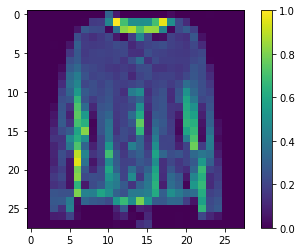

In [ ]:
# Check the model's prediction for the specified sample (manually by our eyes).
plt.figure()
plt.imshow(test_images[sample])
plt.colorbar()
plt.show()

In [ ]:
# ****************** VISUALIZE THE PREDICTION RESULT 01 **********************************

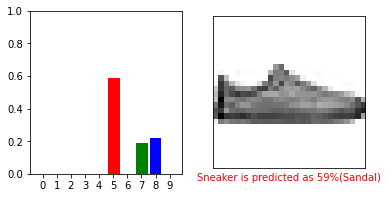

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt_bar(predictions[i], test_labels[i])
plt.subplot(1,2,2)
plt_img(predictions[i], test_labels[i], test_images[i], class_names)
plt.show()

In [ ]:
# ****************** VISUALIZE THE PREDICTION RESULT 02 **********************************

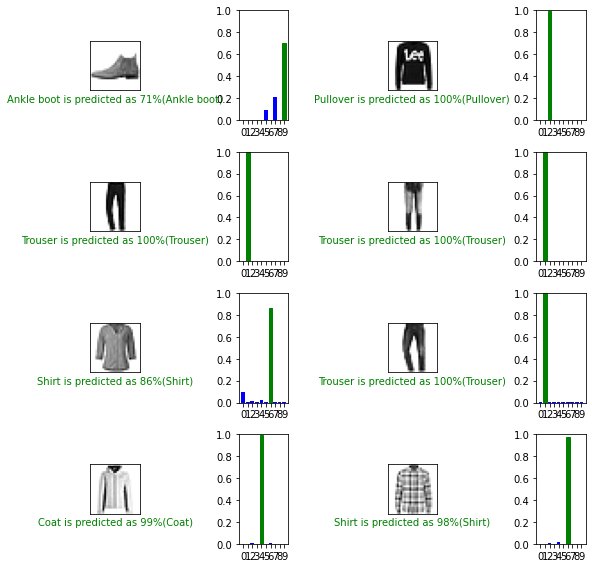

In [ ]:
rows = 4
cols = 2

num_images = rows * cols
plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):
    plt.subplot(rows,2*cols, 2*i+1)
    plt_img(predictions[i], test_labels[i], test_images[i], class_names)
    plt.subplot(rows,2*cols, 2*i+2)
    plt_bar(predictions[i], test_labels[i])
    
plt.tight_layout()
plt.show()